In [1]:
import os 

import numpy as np
import pandas as pd
import seaborn as sns

from statsmodels.tsa.seasonal import STL
from scipy.stats import norm, kstest

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Plots
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

import warnings
warnings.filterwarnings('ignore')

# Prerocessing for FEDOT
from fedot.core.data.data import InputData
from fedot.core.repository.dataset_types import DataTypesEnum
from fedot.core.repository.tasks import Task, TaskTypesEnum, TsForecastingParams

# FEDOT 
from fedot.core.chains.node import PrimaryNode, SecondaryNode
from fedot.core.chains.ts_chain import TsForecastingChain

ModuleNotFoundError: No module named 'fedot.core.chains.ts_chain'

In [4]:
df_rean=pd.read_csv('./timelines_data/formed_timelines_2002/2002_ARCTIC_reanalysis_GRID.csv', sep=';')
df_rean['dates'] =  pd.to_datetime(df_rean['dates'], format='%Y-%m-%d')

for column in list(df_rean.columns.values):
    if column!='dates':
        df_rean[column]=df_rean[column]-np.mean(df_rean[column])
        stl = STL(df_rean[column], period=80)
        res = stl.fit()
        params = norm.fit(res.resid)
        ks = kstest(res.resid, 'norm', params, N=1000)        
        if ks[1]>=0.05:
            #sns.distplot(res.resid, fit=norm, hist=False)
            #plt.show()
            df_rean[column]=df_rean[column]-res.resid
        else:
            print(column)
df_rean

,76.04_8.72,75.84_8.72,75.64_8.72,75.44_8.72,76.44_9.72,76.24_9.72,76.04_9.72,75.84_9.72,75.64_9.72,75.44_9.72,...,76.84_30.72,76.64_30.72,76.44_30.72,76.24_30.72,77.04_31.72,76.84_31.72,76.64_31.72,76.44_31.72,76.84_32.72,dates
0,0.034992,0.034718,0.032032,0.027844,0.026310,0.028339,0.027947,0.027634,0.026690,0.016180,...,-0.020535,-0.027864,-0.034043,-0.034043,0.008050,0.000913,-0.021561,-0.030222,0.001356,2002-01-01
1,0.058270,0.058306,0.055602,0.050686,0.049921,0.051845,0.052467,0.052148,0.051075,0.040347,...,0.022316,0.014934,0.009822,0.009822,0.050113,0.046925,0.027756,0.020172,0.049706,2002-01-02
2,0.062436,0.062537,0.059925,0.055279,0.054040,0.055957,0.057700,0.057536,0.056527,0.046154,...,0.012881,0.001712,-0.008514,-0.008514,0.039593,0.032066,0.008459,-0.002192,0.025435,2002-01-03
3,0.063424,0.063512,0.061063,0.056140,0.054533,0.056757,0.059166,0.058829,0.057676,0.046912,...,-0.017130,-0.022521,-0.022301,-0.022301,0.002329,-0.001674,-0.016318,-0.021154,0.004181,2002-01-04
4,0.056305,0.056191,0.053409,0.047372,0.047233,0.049387,0.050545,0.049952,0.048565,0.036534,...,0.012275,0.009005,0.006407,0.006407,0.034164,0.037784,0.022573,0.016598,0.045194,2002-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.053847,0.047681,0.039707,0.041549,0.063631,0.066376,0.062971,0.055390,0.049154,0.048711,...,0.080870,0.076975,0.081327,0.081327,0.091999,0.084992,0.073588,0.072650,0.071904,2002-12-27
361,0.056429,0.049822,0.040671,0.040778,0.063836,0.067421,0.064336,0.056341,0.049220,0.048054,...,0.059155,0.056916,0.064658,0.064658,0.071171,0.066003,0.055439,0.054380,0.060337,2002-12-28
362,0.059627,0.053090,0.045162,0.045927,0.066616,0.070397,0.067439,0.059568,0.052695,0.052243,...,0.059734,0.057916,0.064062,0.064062,0.076493,0.074301,0.060417,0.056684,0.070495,2002-12-29
363,0.066121,0.059172,0.051419,0.052143,0.075578,0.078953,0.074769,0.066495,0.059423,0.059202,...,0.067323,0.065050,0.070196,0.070196,0.084828,0.082266,0.066639,0.062536,0.074877,2002-12-30


In [5]:
df_nemo=pd.read_csv('./timelines_data/formed_timelines_2002/2002_NEMO_SPITZ_GRID.csv', sep=';')
df_nemo['dates'] =  pd.to_datetime(df_nemo['dates'], format='%d.%m.%Y')

for column in list(df_nemo.columns.values):
    if column!='dates':
        df_nemo[column]=df_nemo[column]-np.mean(df_nemo[column])
        stl = STL(df_nemo[column], period=80)
        res = stl.fit()
        params = norm.fit(res.resid)
        ks = kstest(res.resid, 'norm', params, N=1000)
        if ks[1]>=0.05:
            #sns.distplot(res.resid, fit=norm, hist=False)
            #plt.show()
            #print(ks)
            df_nemo[column]=df_nemo[column]-res.resid
        else:
            print(column)
            
df_nemo

,76.04_8.72,75.84_8.72,75.64_8.72,75.44_8.72,76.44_9.72,76.24_9.72,76.04_9.72,75.84_9.72,75.64_9.72,75.44_9.72,...,76.84_30.72,76.64_30.72,76.44_30.72,76.24_30.72,77.04_31.72,76.84_31.72,76.64_31.72,76.44_31.72,76.84_32.72,dates
0,0.043496,0.041205,0.043296,0.049496,0.018957,0.020623,0.043043,0.037323,0.030662,0.021557,...,-0.006893,-0.016234,-0.021648,-0.021540,0.006230,0.002845,-0.005700,-0.013671,0.009085,2002-01-01
1,0.047268,0.046536,0.044069,0.050039,0.019246,0.021221,0.045237,0.040602,0.034548,0.025336,...,0.000493,-0.009252,-0.014643,-0.014258,0.013718,0.008249,0.000039,-0.006766,0.014637,2002-01-02
2,0.044126,0.044443,0.036774,0.041407,0.010971,0.014720,0.043880,0.036382,0.029206,0.017985,...,-0.004167,-0.012748,-0.017804,-0.017722,0.007621,-0.002128,-0.008281,-0.012912,0.003973,2002-01-03
3,0.062028,0.062371,0.050494,0.054275,0.025246,0.029794,0.058684,0.048697,0.041713,0.030885,...,-0.010836,-0.015992,-0.018431,-0.017348,-0.000368,-0.010376,-0.011623,-0.014038,0.001755,2002-01-04
4,0.071914,0.072430,0.058286,0.061006,0.027560,0.035322,0.063933,0.056161,0.049207,0.039845,...,-0.000004,-0.003843,-0.003772,-0.002390,0.010757,0.006049,0.003313,-0.000569,0.019566,2002-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.045611,0.054914,0.059584,0.077185,0.028578,0.029135,0.054378,0.072661,0.074267,0.059977,...,0.111664,0.117896,0.114245,0.115759,0.105825,0.109763,0.112713,0.115663,0.101524,2002-12-27
361,0.040227,0.046561,0.047235,0.068944,0.020274,0.021585,0.049065,0.066814,0.069268,0.056660,...,0.103190,0.108623,0.107286,0.109981,0.097514,0.100478,0.104291,0.107933,0.094374,2002-12-28
362,0.036336,0.040292,0.039558,0.064122,0.014276,0.015902,0.045349,0.060325,0.064344,0.053484,...,0.099011,0.102547,0.102639,0.105849,0.095617,0.095864,0.098940,0.101429,0.090882,2002-12-29
363,0.032965,0.035805,0.034460,0.062205,0.009790,0.011852,0.042518,0.053357,0.060313,0.050977,...,0.098158,0.100042,0.100620,0.103715,0.097523,0.095937,0.098053,0.098531,0.092439,2002-12-30


### Функция для вывода графика с результатом

In [6]:
def plot_results(actual_time_series, predicted_values, len_train_data, y_name = 'Parameter'):
### Функция для предсказания одним вызовом  
    plt.plot(np.arange(0, len(actual_time_series)), 
             actual_time_series, label = 'Actual values', c = 'green')
    plt.plot(np.arange(len_train_data, len_train_data + len(predicted_values)), 
             predicted_values, label = 'Predicted', c = 'blue')
    # Plot black line which divide our array into train and test
    plt.plot([len_train_data, len_train_data],
             [min(actual_time_series), max(actual_time_series)], c = 'black', linewidth = 1)
    plt.ylabel(y_name, fontsize = 15)
    plt.xlabel('Time index', fontsize = 15)
    plt.legend(fontsize = 15)
    plt.grid()
    plt.show()

### Функция для предсказания одним вызовом

In [7]:
def make_forecast(chain, train_data, len_forecast: int, max_window_size: int):
## Моделирование циклом для всех точек    
    # Here we define which task should we use, here we also define two main 
    # hyperparameters: forecast_length and max_window_size
    task = Task(TaskTypesEnum.ts_forecasting,
                TsForecastingParams(forecast_length=len_forecast,
                                    max_window_size=max_window_size,
                                    return_all_steps=False,
                                    make_future_prediction=True))

    # Prepare data to train the model
    train_input = InputData(idx=np.arange(0, len(train_data)),
                            features=None,
                            target=train_data,
                            task=task,
                            data_type=DataTypesEnum.ts)

    # Make a "blank", here we need just help FEDOT understand that the 
    # forecast should be made exactly the "len_forecast" length
    predict_input = InputData(idx=np.arange(0, len_forecast),
                              features=None,
                              target=None,
                              task=task,
                              data_type=DataTypesEnum.ts)

    # Fit it
    chain.fit_from_scratch(train_input)

    # Predict
    predicted_values = chain.forecast(initial_data=train_input,
                                      supplementary_data=predict_input).predict
    
    return predicted_values

In [8]:
from sklearn import linear_model
def get_hybrid_coeffs(nemo_tr, arima_tr, real_tr):
    df=pd.DataFrame()
    df['x1']=nemo_tr
    df['x2']=arima_tr
    df['y']=real_tr
    X = df[['x1', 'x2']]
    Y = df['y']
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)

    return (regr.intercept_, regr.coef_)

## Моделирование циклом для всех точек

In [2]:
errors_df=pd.DataFrame(columns = ['POINT', 'MSE_RIDGE', 'MAE_RIDGE', 'MAPE_RIDGE', 
                                  'MSE_HYB', 'MAE_HYB', 'MAPE_HYB'])
errors_dict_MSE_RIDGE={}
errors_dict_MAE_RIDGE={}
errors_dict_MAPE_RIDGE={}
errors_dict_MSE_HYB={}
errors_dict_MAE_HYB={}
errors_dict_MAPE_HYB={}


forcact_window=30 # величина всего прогноза (включает часть тестовых данных для поиска весов)
coeff_train_window=10 # размер окна для поиска весов

for column in list(df_rean.columns.values):
    if column!='dates':
        test = df_rean[column][-forcact_window+coeff_train_window:]
        test.index = df_rean['dates'][-forcact_window+coeff_train_window:]
        train = df_rean[column][:-forcact_window]
        train.index = df_rean['dates'][:-forcact_window]

        nemo_pr=np.array(df_nemo[column][-forcact_window:])

        # Define PrimaryNode models - its first level models
        node_first = PrimaryNode('trend_data_model')
        node_second = PrimaryNode('residual_data_model')
        # Define SecondaryNode models - its second level models
        node_trend_model = SecondaryNode('ridge', nodes_from=[node_first])
        node_residual_model = SecondaryNode('ridge', nodes_from=[node_second])
        # Root node - make final prediction
        node_final = SecondaryNode('svr', nodes_from=[node_trend_model, node_residual_model])
        final_chain = TsForecastingChain(node_final)        
        forecasts = pd.Series(make_forecast(chain = final_chain,
                                 train_data = train, 
                                 len_forecast = forcact_window,
                                 max_window_size = 60))


        # выделяем обучающую выборку для поиска коэффициентов (для nemo и реальных данных, тк они уже просчитаны)
        nemo_coef_tr=df_nemo[column][-forcact_window:-forcact_window+coeff_train_window]
        nemo_coef_tr.index = df_nemo['dates'][-forcact_window:-forcact_window+coeff_train_window]
        real_coef_tr=df_rean[column][-forcact_window:-forcact_window+coeff_train_window]
        real_coef_tr.index = df_rean['dates'][-forcact_window:-forcact_window+coeff_train_window]

        # выделяем обучающую выборку RIDGE для поиска коэффициентов
        ridge_coef_tr=forecasts[:coeff_train_window]
        ridge_coef_tr.index = df_nemo['dates'][-forcact_window:-forcact_window+coeff_train_window]

        # рассчитываем коэффициенты для гибридизации
        nemo_coef=get_hybrid_coeffs(nemo_coef_tr, ridge_coef_tr, real_coef_tr)[1][0]
        ridge_coef=get_hybrid_coeffs(nemo_coef_tr, ridge_coef_tr, real_coef_tr)[1][1]
        const=get_hybrid_coeffs(nemo_coef_tr, ridge_coef_tr, real_coef_tr)[0]

        RIDGE_MSE_errors_list=[]
        RIDGE_MAE_errors_list=[]
        RIDGE_MAPE_errors_list=[]

        HYB_MSE_errors_list=[]
        HYB_MAE_errors_list=[]
        HYB_MAPE_errors_list=[]

        for j in range (forcact_window-coeff_train_window): # для каждой ячейки из test
            print(j)
            predictions_list=[]
            for i in range (forcact_window): # для каждой из заблаговременностей
                data = df_rean[column][:-forcact_window+j-i] # выделяем обучающую выборку
                f_size = i+1 # величина предсказания

                forecasts_i = make_forecast(chain = final_chain,
                                 train_data = train_data, 
                                 len_forecast = forcact_window,
                                 max_window_size = 60).tolist()[-1]
                
                predictions_list.append(forecasts_i)# добавляем предсказание в список предсказаний со всеми заблаговременостями

            real_val_list=np.full(forcact_window, test[j]) # создаем массив верных значений
            nemo_real_val_list=np.full(forcact_window, nemo_pr[j]) # создаем массив верных значений по NEMO

            # расчет гибридной модели
            hyb_forecast=nemo_coef*nemo_pr+ridge_coef*forecasts+const
            hyb_forecast.index = df_nemo['dates'][-forcact_window:]           


            # считаем ошибки как отклонения от реального значения
            RIDGE_MSE_errors_list.append(mean_squared_error(real_val_list, predictions_list))
            RIDGE_MAE_errors_list.append(mean_absolute_error(real_val_list, predictions_list))
            RIDGE_MAPE_errors_list.append(round(np.mean(np.abs(real_val_list-predictions_list)/real_val_list)*100,3))

            HYB_MSE_errors_list.append(mean_squared_error(real_val_list, hyb_forecast))
            HYB_MAE_errors_list.append(mean_absolute_error(real_val_list, hyb_forecast))
            HYB_MAPE_errors_list.append(round(np.mean(np.abs(real_val_list-hyb_forecast)/real_val_list)*100,3))
                
                
            plt.plot(np.arange(len(predictions_list)), predictions_list, label='prediction for timestep')
            plt.axhline(y=test[j], color='r', linestyle='-', label='real value')
            plt.xlabel("Заблаговременность прогноза (дни)")
            plt.legend()
            plt.grid()
            plt.show()    
                
                
        errors_dict_MSE_RIDGE[column]=RIDGE_MSE_errors_list
        errors_dict_MAE_RIDGE[column]=RIDGE_MAE_errors_list
        errors_dict_MAPE_RIDGE[column]=RIDGE_MAPE_errors_list
        errors_dict_MSE_HYB[column]=HYB_MSE_errors_list
        errors_dict_MAE_HYB[column]=HYB_MAE_errors_list
        errors_dict_MAPE_HYB[column]=HYB_MAPE_errors_list
        print(errors_dict_MSE_RIDGE)
        errors_df = errors_df.append({'POINT': column, 
                                      'MSE_RIDGE': np.mean(RIDGE_MSE_errors_list),
                                      'MAE_RIDGE': np.mean(RIDGE_MAE_errors_list),
                                      'MAPE_RIDGE':np.mean(RIDGE_MAPE_errors_list),
                                      'MSE_HYB':np.mean(HYB_MSE_errors_list),
                                      'MAE_HYB':np.mean(HYB_MAE_errors_list),
                                      'MAPE_HYB':np.mean(HYB_MAPE_errors_list),
                                     } , ignore_index=True)
        
errors_df

NameError: name 'df_rean' is not defined

In [28]:
errors_df['MSE_DIF']=abs(errors_df['MSE_HYB'])-abs(errors_df['MSE_RIDGE'])
errors_df['MAE_DIF']=abs(errors_df['MAE_HYB'])-abs(errors_df['MAE_RIDGE'])
errors_df['MAPE_DIF']=abs(errors_df['MAPE_HYB'])-abs(errors_df['MAPE_RIDGE'])

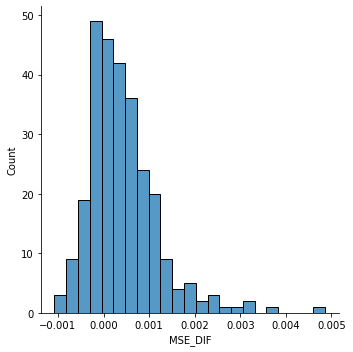

In [29]:
sns.displot(errors_df, x="MSE_DIF")

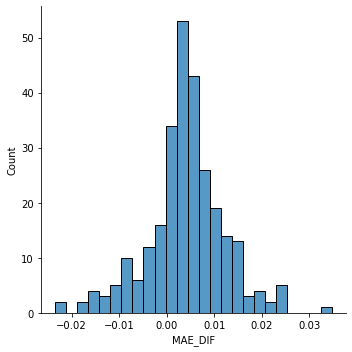

In [30]:
sns.displot(errors_df, x="MAE_DIF")

Text(0.5, 1.0, 'MAPE distribution comparison for Ridge and hybrid model')

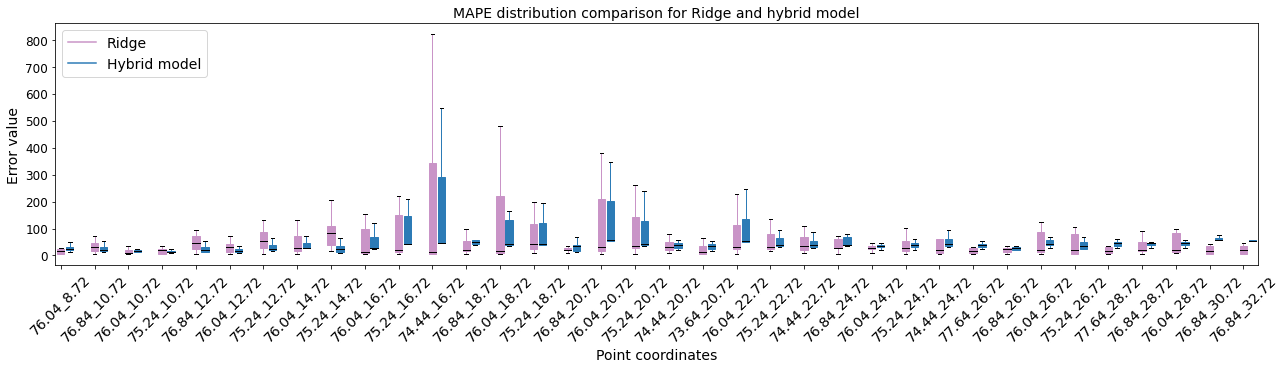

In [23]:
labels=['76.04_8.72', '76.84_10.72', '76.04_10.72', '75.24_10.72', '76.84_12.72', '76.04_12.72', '75.24_12.72', '76.04_14.72', '75.24_14.72', '76.04_16.72', '75.24_16.72', '74.44_16.72', '76.84_18.72', '76.04_18.72', '75.24_18.72', '76.84_20.72', '76.04_20.72', '75.24_20.72', '74.44_20.72', '73.64_20.72', '76.04_22.72', '75.24_22.72', '74.44_22.72', '76.84_24.72', '76.04_24.72', '75.24_24.72', '74.44_24.72', '77.64_26.72', '76.84_26.72', '76.04_26.72', '75.24_26.72', '77.64_28.72', '76.84_28.72', '76.04_28.72', '76.84_30.72', '76.84_32.72']
rcParams['figure.figsize'] = 18, 5
ridge_mse=[]
hyb_mse=[]

for label in labels:
    ridge_mse.append(errors_dict_MAPE_RIDGE[label])
    hyb_mse.append(errors_dict_MAPE_HYB[label])

data_a = ridge_mse
data_b = hyb_mse

ticks = labels

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color='black')
    plt.setp(bp['medians'], color='black')

plt.figure()

bpl = plt.boxplot(data_a, positions=np.array(range(len(data_a)))*3.0-0.4,  widths=0.65, sym='', patch_artist=True)
bpr = plt.boxplot(data_b, positions=np.array(range(len(data_b)))*3.0+0.4,  widths=0.65, sym='', patch_artist=True)
set_box_color(bpl, '#c994c7') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#c994c7', label='Ridge')
plt.plot([], c='#2C7BB6', label='Hybrid model')
plt.legend(loc='upper left', fontsize=14)

plt.xticks(np.array(range(len(data_a)))*3.0-0.4, ticks, rotation=45, size=14)
plt.yticks(size=12)
plt.ylabel('Error value', size=14)
plt.xlabel('Point coordinates', size=14)
plt.tight_layout()
plt.title('MAPE distribution comparison for Ridge and hybrid model', size=14)

Text(0.5, 1.0, 'MSE distribution comparison for Ridge and hybrid model')

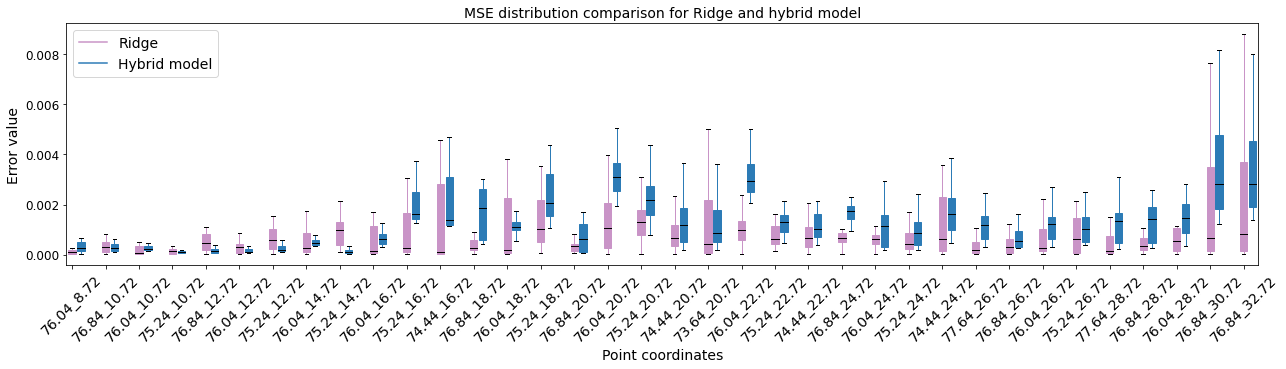

In [24]:
labels=['76.04_8.72', '76.84_10.72', '76.04_10.72', '75.24_10.72', '76.84_12.72', '76.04_12.72', '75.24_12.72', '76.04_14.72', '75.24_14.72', '76.04_16.72', '75.24_16.72', '74.44_16.72', '76.84_18.72', '76.04_18.72', '75.24_18.72', '76.84_20.72', '76.04_20.72', '75.24_20.72', '74.44_20.72', '73.64_20.72', '76.04_22.72', '75.24_22.72', '74.44_22.72', '76.84_24.72', '76.04_24.72', '75.24_24.72', '74.44_24.72', '77.64_26.72', '76.84_26.72', '76.04_26.72', '75.24_26.72', '77.64_28.72', '76.84_28.72', '76.04_28.72', '76.84_30.72', '76.84_32.72']

ridge_mse=[]
hyb_mse=[]

for label in labels:
    ridge_mse.append(errors_dict_MSE_RIDGE[label])
    hyb_mse.append(errors_dict_MSE_HYB[label])

data_a = ridge_mse
data_b = hyb_mse

ticks = labels

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color='black')
    plt.setp(bp['medians'], color='black')

plt.figure()

bpl = plt.boxplot(data_a, positions=np.array(range(len(data_a)))*3.0-0.4,  widths=0.65, sym='', patch_artist=True)
bpr = plt.boxplot(data_b, positions=np.array(range(len(data_b)))*3.0+0.4,  widths=0.65, sym='', patch_artist=True)
set_box_color(bpl, '#c994c7') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#c994c7', label='Ridge')
plt.plot([], c='#2C7BB6', label='Hybrid model')
plt.legend(loc='upper left', fontsize=14)

plt.xticks(np.array(range(len(data_a)))*3.0-0.4, ticks, rotation=45, size=14)
plt.yticks(size=12)
plt.ylabel('Error value', size=14)
plt.xlabel('Point coordinates', size=14)
plt.tight_layout()
plt.title('MSE distribution comparison for Ridge and hybrid model', size=14)

Text(0.5, 1.0, 'MAE distribution comparison for Ridge and hybrid model')

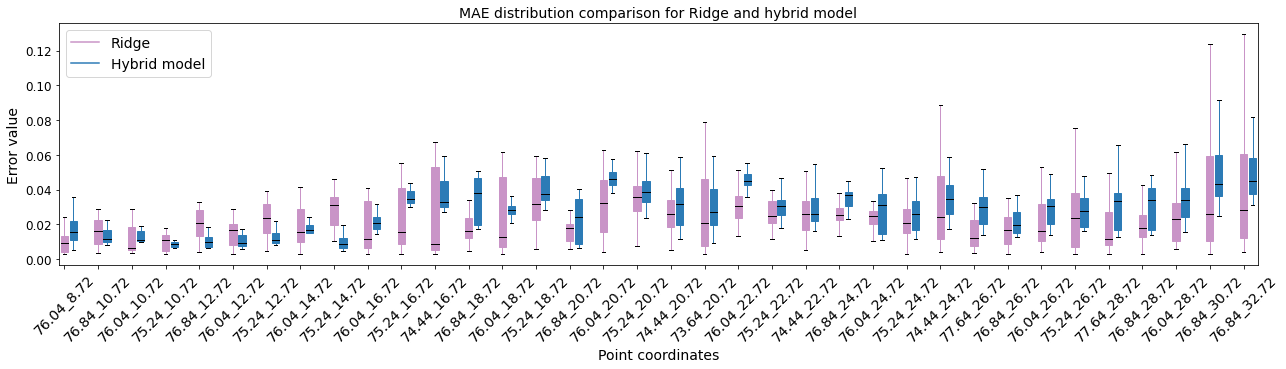

In [25]:
labels=['76.04_8.72', '76.84_10.72', '76.04_10.72', '75.24_10.72', '76.84_12.72', '76.04_12.72', '75.24_12.72', '76.04_14.72', '75.24_14.72', '76.04_16.72', '75.24_16.72', '74.44_16.72', '76.84_18.72', '76.04_18.72', '75.24_18.72', '76.84_20.72', '76.04_20.72', '75.24_20.72', '74.44_20.72', '73.64_20.72', '76.04_22.72', '75.24_22.72', '74.44_22.72', '76.84_24.72', '76.04_24.72', '75.24_24.72', '74.44_24.72', '77.64_26.72', '76.84_26.72', '76.04_26.72', '75.24_26.72', '77.64_28.72', '76.84_28.72', '76.04_28.72', '76.84_30.72', '76.84_32.72']

ridge_mse=[]
hyb_mse=[]

for label in labels:
    ridge_mse.append(errors_dict_MAE_RIDGE[label])
    hyb_mse.append(errors_dict_MAE_HYB[label])

data_a = ridge_mse
data_b = hyb_mse

ticks = labels

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color='black')
    plt.setp(bp['medians'], color='black')

plt.figure()

bpl = plt.boxplot(data_a, positions=np.array(range(len(data_a)))*3.0-0.4,  widths=0.65, sym='', patch_artist=True)
bpr = plt.boxplot(data_b, positions=np.array(range(len(data_b)))*3.0+0.4,  widths=0.65, sym='', patch_artist=True)
set_box_color(bpl, '#c994c7') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#c994c7', label='Ridge')
plt.plot([], c='#2C7BB6', label='Hybrid model')
plt.legend(loc='upper left', fontsize=14)

plt.xticks(np.array(range(len(data_a)))*3.0-0.4, ticks, rotation=45, size=14)
plt.yticks(size=12)
plt.ylabel('Error value', size=14)
plt.xlabel('Point coordinates', size=14)
plt.tight_layout()
plt.title('MAE distribution comparison for Ridge and hybrid model', size=14)